<a href="https://colab.research.google.com/github/Naessss/AI_Study/blob/master/05_02%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D_%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# validation data
# 학습데이터로 학습 시 오버피팅 문제를 보안하기 위해 중간중간 검증 데이터셋을 섞어서 학습

"""
  지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어평가를 진행하는데
  근데 결국 테스트세트로 평가를하면 테스트세트에 맞는 모델이 만들어 지는 결론이 나온다.
  테스트 세트에 일반화 성능을 올바르게 예측하려면 가능한 한 테스트세트를 사용하지 말아야 한다.
  모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.

  결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝 해보자.
"""

'\n  지금까지 배운 알고리즘은 훈련세트와 테스트세트를 나누어평가를 진행하는데\n  근데 결국 테스트세트로 평가를하면 테스트세트에 맞는 모델이 만들어 지는 결론이 나온다. \n  테스트 세트에 일반화 성능을 올바르게 예측하려면 가능한 한 테스트세트를 사용하지 말아야 한다. \n  모델을 만들고 나서 마지막에 딱 한번 사용하는 것이 좋다.\n\n  결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝 해보자.\n'

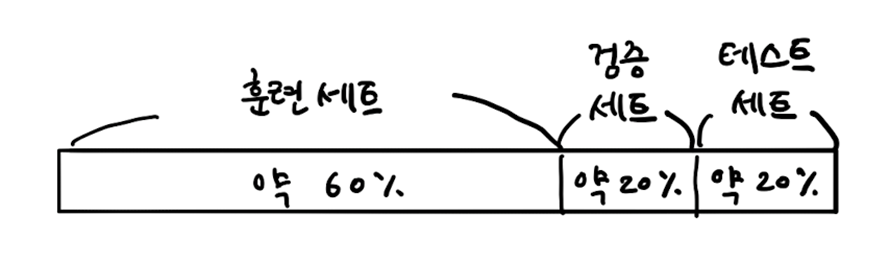

In [ ]:
# 검증세트
# 테스트 세트를 사용하지 않으려면 모델이 과대적합인지
# 과소적합인지 판단하기 어렵다.
# 테스트 세트를 사용하지 않고 측정하는 간단한 방법은
# 훈련세트를 또 나눈는 것이다.
# 훈련세트 60%, 검증세트 20%, 테스트세트 20% -> 실무에서 많이 쓰는 기법

# 테스트하고 싶은 매개변수를 바꿔가면서 가장 좋은 모델이 나올 수 있음
# 이 매개변수를 사용해 훈련세트와 검증세트를 합쳐 전체 훈련 데이터에서 모델을 다시 훈련함
# 마지막 테스트에서 최종 점수를 평가함
# 훈련세트에서 모델을 훈련하고 검증세트로 모델을 평가함.
# 마지막 세트에서 테스트세트를 이용해 최종 점수를 평가함.

In [ ]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
# 훈련세트와 테스트 세트를 나눔
# 원본데이터 6497개 20% = train(5197) , test(1300)
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) # 20%

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
# 검증세트 20% 생성
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
# sub_input, sub_target과 val_input, val_target을 사용해 모델을 만들고 평가함.
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target) # 훈련

print(dt.score(sub_input, sub_target)) # 출력 99.71%(과대적합)
print(dt.score(val_input, val_target)) # 검증 86.44%

0.9971133028626413
0.864423076923077


In [ ]:
# 검증세트를 만드느냐고 훈련 세트가 줄었음. (이럴때 많은 데이터를 훈련하면 좋은 결과가 나옴)
# 교차 검증 : 검증 세트를 떼어 내어 평가하는 과정을 여러번 반복함
# [훈련세트, 훈련세트, 검증세트]
# [훈련세트, 검증세트, 훈련세트]
# [검증세트, 훈련세트, 훈련세트] -> 패리티 방식(3-폴드 교차 검증)
# 5-폴드, 10-폴드도 있음
# 사이킷런에는 cross_validate()라는 교차 검증 함수를 사용

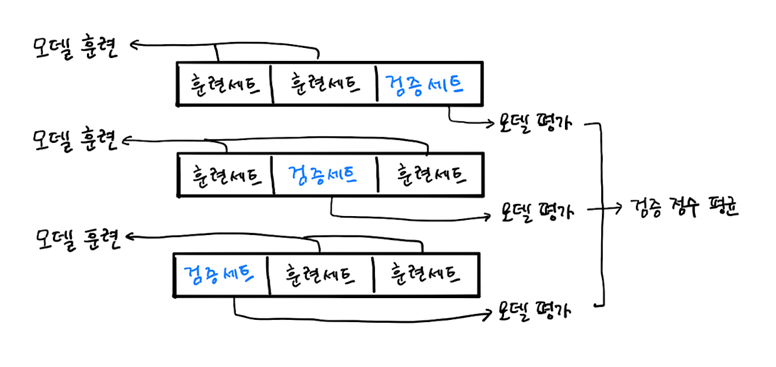

In [ ]:
from sklearn.model_selection import cross_validate

# 평가할 모델 객체를 첫번째 매개변수, 검증데이터를 따로 처리하지않고 훈련데이터 전체를 처리
scores = cross_validate(dt, train_input, train_target)
# cv 매개변수를 이용해 폴드 수를 변경함 cv=5(기본값)
# scores = cross_validate(dt, train_input, train_target, cv=5)

print(scores)
# fit_time(훈련시간), score_time(검증시간), test_score(최종점수) 키를 가진 딕셔너리(k : v)를 반환함

{'fit_time': array([0.04022503, 0.01201868, 0.01255941, 0.01280928, 0.01237345]), 'score_time': array([0.00322223, 0.00192475, 0.00184393, 0.00229239, 0.00189924]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
import numpy as np

# 검증폴드 점수
# 5개의 검증 점수의 평균
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
# 주의 : cross_validate()는 훈련세트를 섞어서 폴드를 나누지 않음 -> 분할기 사용(splitter)
# 앞서 우리는 tarin_test_split() 함수로 전체 데이터를 섞은 후 훈련세트를 준비했음
# 만약 교차 검증을 할 때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.

# 사이킷런의 분할기는 교차검증에서 폴드를 어떻게 나눌지를 결정함
# cross_validate()는 기본적으로 회귀모델인 KFold 분할기를 사용함
# 분류 모델일 경우 타킷 클래스를 골고루 나누기 위해서 StratifiedKFold를 사용한다.
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())

print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.01302099, 0.01224518, 0.01302481, 0.01262856, 0.01214576]), 'score_time': array([0.00206017, 0.00215602, 0.00195742, 0.00183773, 0.00184774]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
0.855300214703487


In [ ]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10-폴드 교차 검증 수행
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.0234499 , 0.04424739, 0.01926875, 0.01483679, 0.01461029,
       0.01403952, 0.01353145, 0.0135057 , 0.01364231, 0.01317883]), 'score_time': array([0.01337099, 0.00180221, 0.00228   , 0.00590181, 0.00172353,
       0.00164247, 0.0019896 , 0.001683  , 0.00179768, 0.00190711]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
0.8574181117533719


In [ ]:
# 결정트리의 매개변수 값을 바꿔가며 가장 좋은 성능이 나오는 모델을 찾아봐야 함
# 테스트 세트를 사용하지 않고 교차 검증을 통해서 좋은 모델을 골라야 함

# 하이퍼파라미터 튜닝
# 모델 파라미터 : 머신런닝 모델이 학습하는 파라미터
# 하이퍼파라미터 : 사용자가 지정해야만 하는 파라미터
# 하이퍼파라미터 튜닝 : 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련
# 그 다음 검증세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 변경 1~2, 5~6개의 매개변수를 제공
# AutoML : 사람의 개입없이 하이퍼파라미터 튜닝을 자동으로 수행하는 기술

# Max_depth 를 최적으로 고정하고 min_sample_split을 바꿔가며 최적의 값을 찾는다면 값이 함께 변경됨
# -> 두개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 함 -> 다중 for문을 사용해야 됨(복잡해 짐)
# 사이킷런에서 제공하는 그리드 서치(Grid Search)가 제공 GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV # 그리드서치크로스검증용
# min_impurity_decrease 매개변수의 최적값을 찾아보자
# min_sample_split : 샘플을 최소한 몇개 이상이어야 split(하위 노드로 분리) 할것인지
#   클수록 가지치기(과대적합 방지), 작을 수록 정확하기(과대적합)
# 매개변수와 탐색할 값을 리스트를 딕셔너리로 만듬
params = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]} # 0.0001~ 증가 5번

# 결정 트리 클래스의 객체를 생성하자마자 바로 전달 함
# 일반 모델을 훈련하는 것 처럼 fit() 메서드를 호출 함
# 이 메서드를 호출 하면 서치 객체는 결정 트리 모델 min_impurity_decrease 값을 바꿔가면서 총 5번 수행
# GridSearchCV의 cv 매개변수 기본 값은 5임 5*5 = 25 번 수행
# n_jobs에서 병렬 실행에 사용될 CPU 코어수를 지정함 (-1로 사용시 모든 코어)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

# 교차 검증에서 최적의 하이퍼파라미터를 찾으면 전체 훈련 세트로 모델을 다시 만들어야 하지만
# 사이킷런의 그리드 서치는 검증 점수가 가장 높은 모델의 매개변수 조합으로
# 전체 훈련 세트에서 자동으로 다시 모델을 훈련 함
gs.fit(train_input, train_target) # 훈련시작

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
# 이렇게 최적화되어 훈련된 모델은 GridSearchCV 클래스로 만들어진
# 객체의 best_estimator_ 속성에 저장되어 있다.
# 최적의 매개변수는 best_params_ 속성에 저장되어 있다.
print(f"그리드 서치를 통해 찾은 최적의 모델의 정확도 : {dt.score(train_input, train_target)*100:.2f}%")

그리드 서치를 통해 찾은 최적의 모델의 정확도 : 97.06%


In [ ]:
# 각 매개변수에서 수행한 교차 검증의 평균 점수는 cv_results_ 속성의 'mean_test_score'키에 저장되어 있다.
print(f"최적의 매개변수 : {gs.best_params_}")

최적의 매개변수 : {'min_impurity_decrease': 0.0001}


In [ ]:
# 5번의 교차 검증으로 얻은 점수를 출력해보자.
print(gs.cv_results_['mean_test_score']) # 첫 번째 값이 가장 큰것 같다!!!

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [ ]:
# 눈으로 보는 것 보다 넘파이를 이용해 argmax()함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다.
# 그 다음 이 인덱스를 사용해서 params 키에 저장된 매개변수를 출력해보자.
# 이 값이 최상의 검증 점수를 만든 매개변수의 조합이 된다.

# 교차검증으로 얻은 점수 목록들 중 가장큰 점수의 인덱스를 반환
best_index = np.argmax(gs.cv_results_['mean_test_score'])
# 사용한 파라미터들 중 가장 큰 점수의 인덱스를 활용해 추출
print(gs.cv_results_['params'][best_index])

# 과정 요약
# 1. 탐색할 매개변수 지정
# 2. 훈련 세트에서 그리드 서치를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾음
#    -> 그리드 서치에 저장
# 3. 그리드 서치는 최상의 매개변수에서 전체 훈련 세트를 사용해 최종 모델을 훈련
#    -> 그리드 서치에 저장

{'min_impurity_decrease': 0.0001}


In [ ]:
# 조금 더 복잡한 매개변수 조합 해보겠음
# 노드를 분할하기 위한 불순도 감소 최소량 지정 max_depth(트리의 깊이)
# min_samples_split 노드를 나누기 위한 최소 샘플 수
# 넘파이 arange() 함수는 첫번째 매개변수 값에서 시작해서
# 두번째 매개변수에 도달할 때까지 세번째 매개변수를 계속 더한 배열을 만듬

# 0.0001 ~ 0.001까지 0.0001을 더한 배열 (두번째 매개변수는 포함되지 않음) = 9번
# 파이썬 range() 함수는 정수만 사용가능 5~20까지 1씩 증가 = 15개
# 교차 검증 회수 9*15*10=1350개 * 5(5-폴드교차) = 6750개
params = {
    'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001), # 9번
    'max_depth' : range(5, 20, 1),                              # 5~19까지 15번
    'min_samples_split' : range(2, 100, 10)                     # 분할 할 수 있는 샘플 수 지정 10번( 2, 12, 22 ,... 92 )
}

# == 파라미터 종류들 ==
# criterion : 분할 품질을 측정하는 기능 (default : gini)
# splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
# max_depth : 트리의 최대 깊이 (값이 클수록 모델의 복잡도가 올라간다.)
# min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
# min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
# min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
# max_features : 각 노드에서 분할에 사용할 특징의 최대 수
# random_state : 난수 seed 설정
# max_leaf_nodes : 리프 노드의 최대수
# min_impurity_decrease : 최소 불순도
# min_impurity_split : 나무 성장을 멈추기 위한 임계치
# class_weight : 클래스 가중치
# presort : 데이터 정렬 필요 여부

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
print(gs.best_params_) # 최상의 매개변수 조합

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score'])) # 최상의 교차 점수

0.8683865773302731


In [ ]:
# 매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어려울 수 있음
# 너무 많은 매개 변수 조건이 있어 그리드 서치 수행시간이 오래 걸림

# 해결 : 랜덤 서치를 사용해보자.

# 랜덤서치 : 매개변수의 값의 목록을 전달하는 것이 아니라 매개변수를 샘플링할 수 잇는 확률 분포도 객체를 전달
# 싸이파이 : 파이썬의 핵심 과학 라이브러리로 적분, 보간, 선형대수, 확률 등 포함한 수치 계산용 전용 라이브러리(코랩에 내장)

# uniform, randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다.(균등 분포에서 샘플링)
# randint()에서는 정수값을 추출, uniform()은 실수값을 뽑음
from scipy.stats import uniform, randint

rgen= randint(0, 10)
rgen.rvs(10)

np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([108,  91,  87, 117,  81,  99,  99, 118,  95, 105]))

In [ ]:
ugen = uniform(0, 1) # 실수도 테스트
ugen.rvs(10)    # 난수발생기(랜덤과 유사)

array([0.15422571, 0.78569919, 0.79926096, 0.2945992 , 0.64769816,
       0.19257699, 0.70875253, 0.90793724, 0.95795231, 0.76323269])

In [ ]:
# 탐색할 매개변수의 딕서너리를 만들어 봄
# min_samples_leaf을 탐색 대상에 추가
params = {
    'min_impurity_decrease': uniform(0.0001, 0.001), # 0.00001 ~ 0.001의 실수값
    'max_depth': randint(20, 50),                   # 20~50 사이의 정수
    'min_samples_split': randint(2, 25),            # 2~25 사이의 정수
    'min_samples_leaf': randint(1, 25),             # 1~25 사이의 정수
    # 리프 노드가 되기 위한 최소 샘플 개수(지식 노드의 샘플 수가 이 값보다 작으면 분할 하지 않음)
}

In [ ]:
# 하이퍼파라미터 값을 랜덤으로 함.
# 검증하는 CV클래스도 랜덤용으로 사용
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=1, random_state=42)
rs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x782468d02c90>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78241175e310>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7824113fadd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7824113fa4d0>},
                   random_state=42)

In [ ]:
print(rs.best_params_)
print(np.max(rs.cv_results_['mean_test_score']))

dt = rs.best_estimator_
print(rs.score(test_input, test_target))

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}
0.8695428296438884
0.86


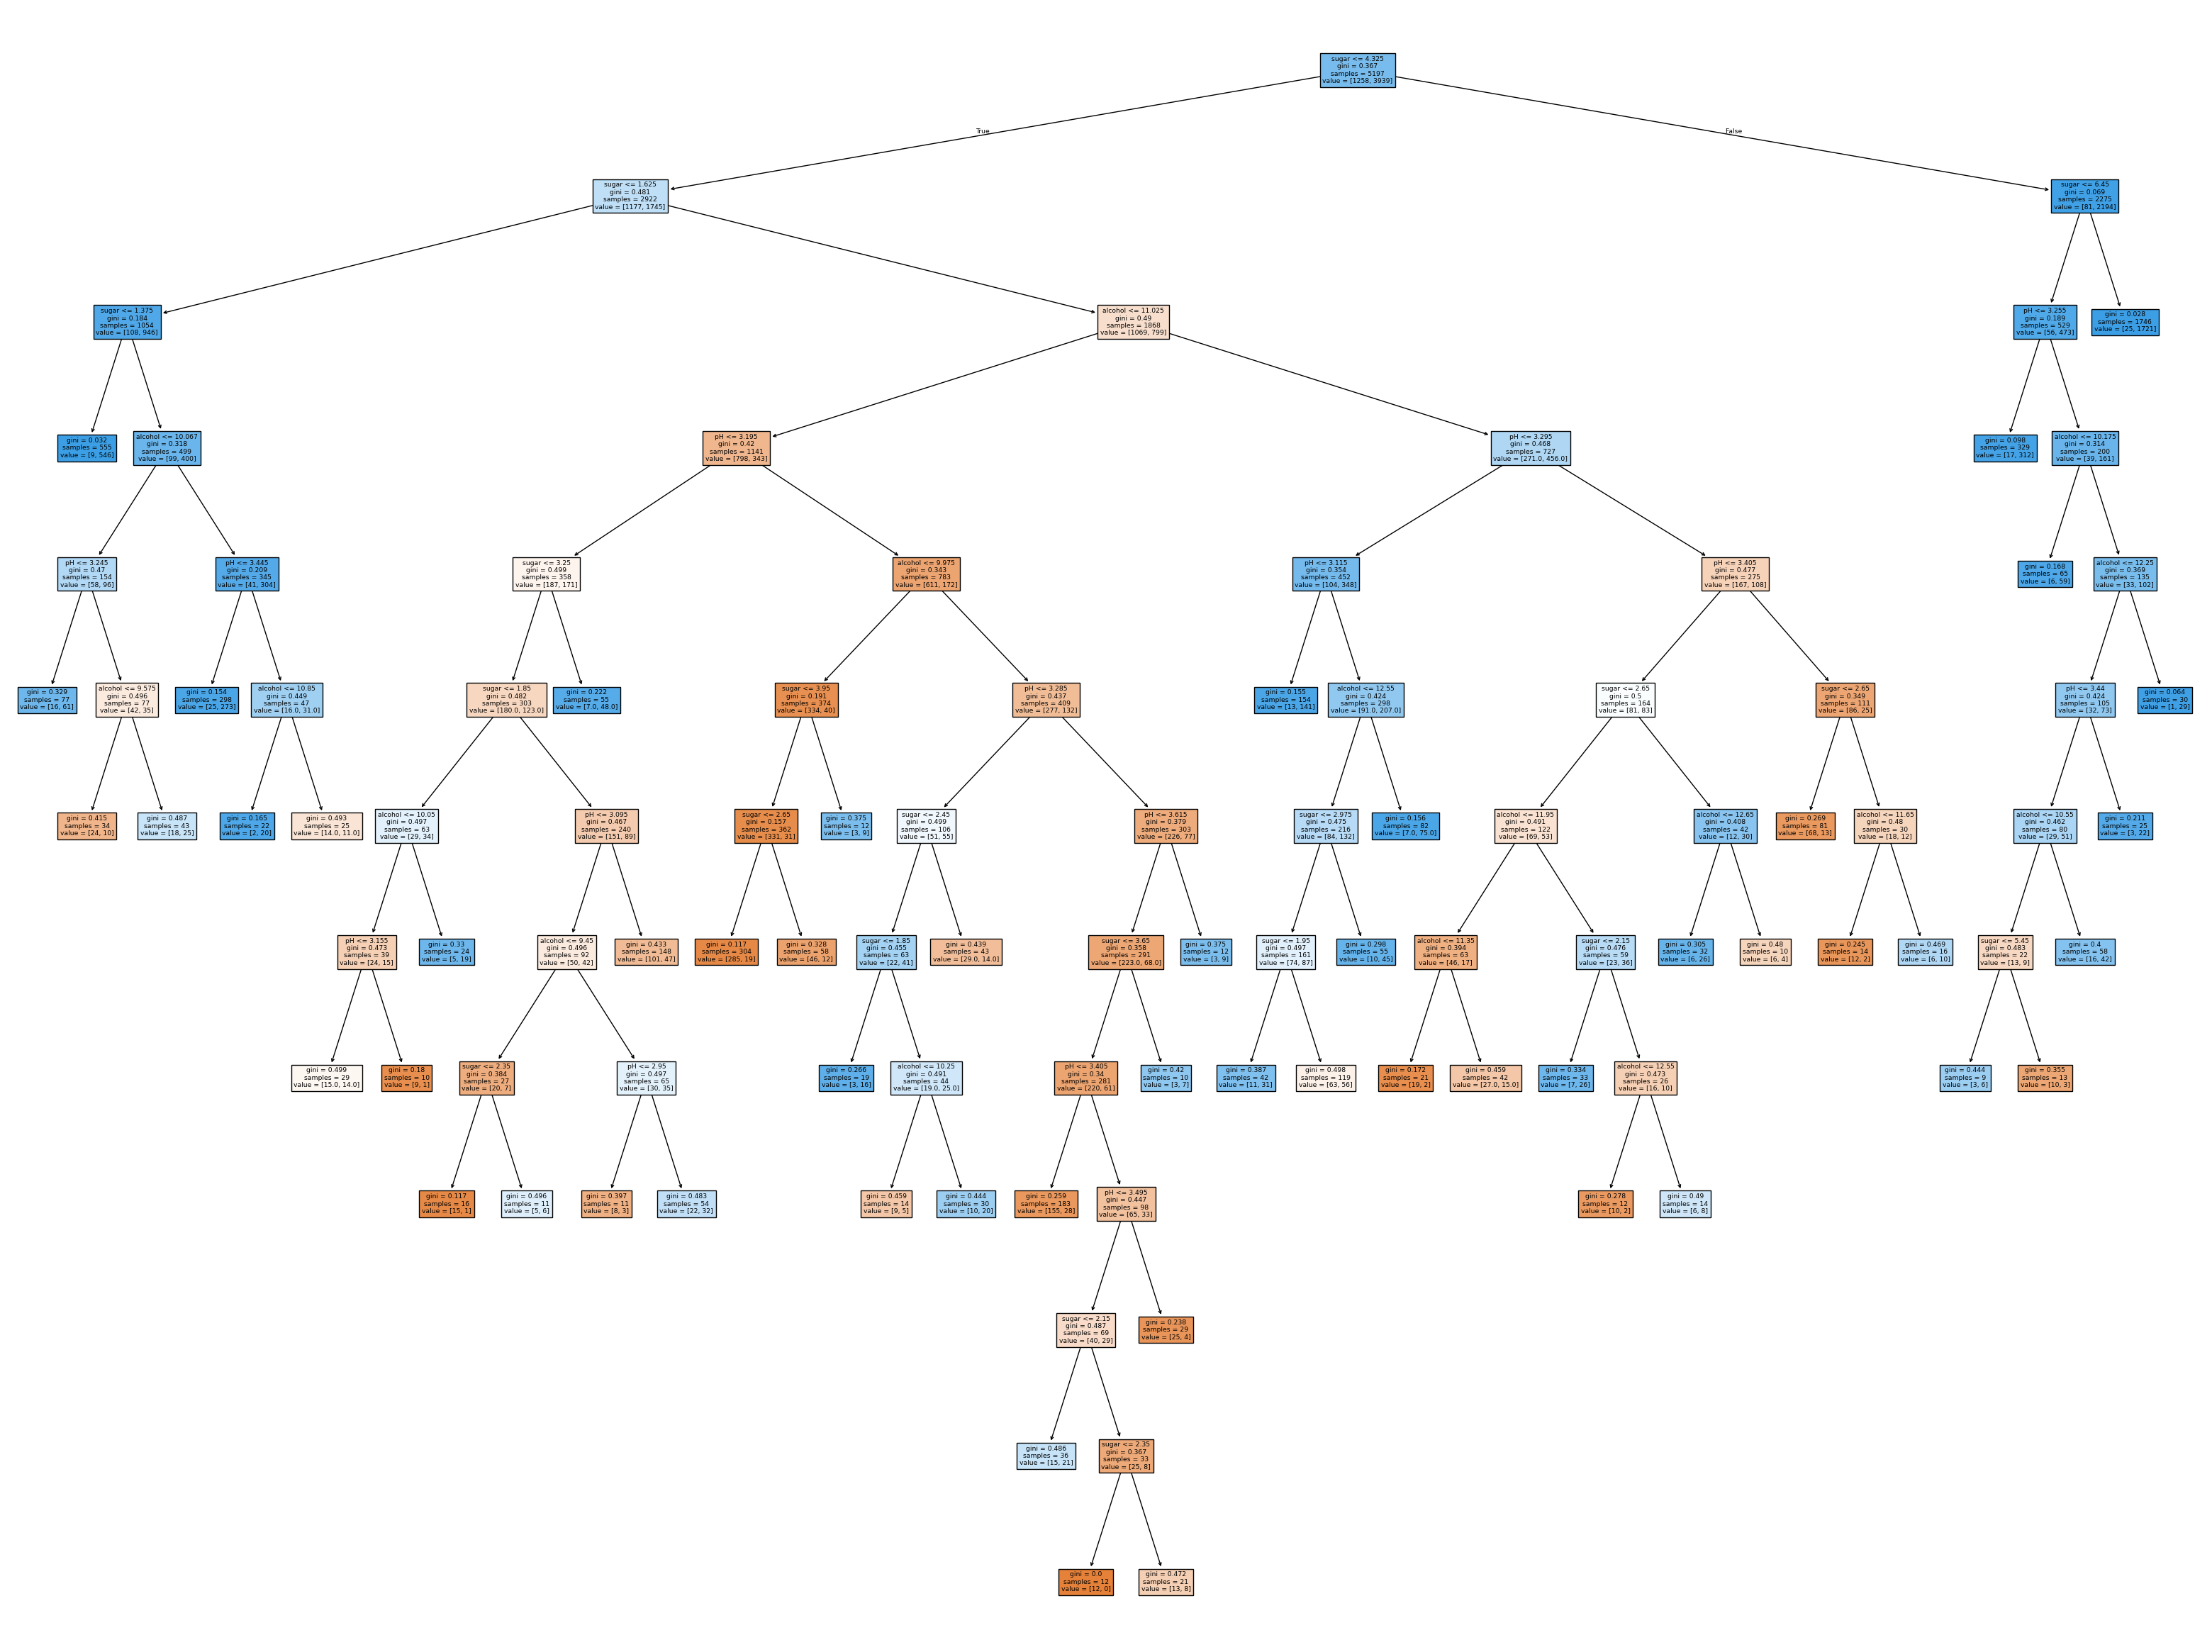

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40,30))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()